In [ ]:
## Notebook env: mirtud_env (R kernel)
## evaluating proliferation effects of selected TuDs

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Analysis

In [2]:
## load in data
selected_TuDs_tRFs_proliferation_assay = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/042924_raw_data_plate_1_redo_of_041024_with_6k_cells_seeded.txt', sep='\t', header=T)
tRF_names = c('NC1', 'NC2', 'tRNA-Gly-CCC', 'tRNA-Met-CAT', 'tRNA-Asp-GTC', 'tRNA-Arg-CCT', 'tRNA-Arg-ACG', 'tRNA-Ala-TGC', 'tRNA-Gln-TTG', 'tRNA-Gly-TCC', 'tRNA-Cys-GCA')
colnames(selected_TuDs_tRFs_proliferation_assay) = c('Time Stamp', 'Elapsed hours', unlist(lapply(tRF_names, function(x) paste(x, 1:8, sep = '_'))))
selected_TuDs_tRFs_proliferation_assay = selected_TuDs_tRFs_proliferation_assay[colnames(selected_TuDs_tRFs_proliferation_assay) != 'Time Stamp']
head(selected_TuDs_tRFs_proliferation_assay)

,Elapsed hours,NC1_1,NC1_2,NC1_3,NC1_4,NC1_5,NC1_6,NC1_7,NC1_8,NC2_1,⋯,tRNA-Gly-TCC_7,tRNA-Gly-TCC_8,tRNA-Cys-GCA_1,tRNA-Cys-GCA_2,tRNA-Cys-GCA_3,tRNA-Cys-GCA_4,tRNA-Cys-GCA_5,tRNA-Cys-GCA_6,tRNA-Cys-GCA_7,tRNA-Cys-GCA_8
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,16.32041,18.93247,18.25731,17.37123,15.99722,18.64319,17.27054,16.02590,18.02280,⋯,21.92338,21.64483,14.77450,18.88504,17.81226,18.70623,18.16112,18.79418,18.80515,16.94414
2,6,18.91523,22.32992,21.85871,19.85406,19.00667,21.34127,20.28508,18.74361,20.41490,⋯,25.02700,24.47644,16.97706,21.89634,21.28568,21.11803,21.32771,21.10413,21.22094,19.40911
3,12,22.27945,26.53020,24.77706,23.13634,21.87141,25.12463,23.53659,22.50648,23.96191,⋯,30.51444,29.11413,20.16816,25.40008,24.47082,24.59076,25.04483,24.59466,25.49969,21.65913
4,18,25.47384,30.59505,29.35645,26.72513,25.51973,28.86149,26.76219,26.05301,27.96512,⋯,34.82405,32.78668,23.38276,29.21468,28.33240,29.54969,29.26938,28.82261,29.77890,25.60896
5,24,29.86570,36.31280,34.14847,31.25286,29.53347,32.91589,31.45330,30.58945,32.39523,⋯,40.51437,38.09262,27.22441,33.63619,33.41057,34.13928,34.21807,33.55437,33.86803,29.39085
6,30,34.22643,41.05750,38.74921,36.46019,34.13898,37.50887,36.92704,35.46758,37.36857,⋯,46.08638,43.75491,30.39643,38.81270,38.41016,38.76765,40.20552,38.33121,38.69540,32.90360


In [3]:
## mean by replicate
selected_TuDs_tRFs_proliferation_assay_mean = selected_TuDs_tRFs_proliferation_assay %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('tRF', 'replicate'), names_sep = '_') %>% group_by(`Elapsed hours`, tRF) %>% summarise(mean = mean(value), sd = sd(value))
head(selected_TuDs_tRFs_proliferation_assay_mean)

`summarise()` has grouped output by 'Elapsed hours'. You can override using the
`.groups` argument.


Elapsed hours,tRF,mean,sd
<int>,<chr>,<dbl>,<dbl>
0,NC1,17.35228,1.1741134
0,NC2,20.99462,1.8409284
0,tRNA-Ala-TGC,27.42697,1.0413703
0,tRNA-Arg-ACG,22.15416,0.6465356
0,tRNA-Arg-CCT,16.14192,1.9948976
0,tRNA-Asp-GTC,19.39298,2.2039927


In [4]:
wider_selected_TuDs_tRFs_proliferation_assay_mean = selected_TuDs_tRFs_proliferation_assay_mean %>% select(-sd) %>% pivot_wider(names_from = 'tRF', values_from = 'mean')
wider_selected_TuDs_tRFs_proliferation_assay_mean = as.data.frame(wider_selected_TuDs_tRFs_proliferation_assay_mean)
head(wider_selected_TuDs_tRFs_proliferation_assay_mean)

,Elapsed hours,NC1,NC2,tRNA-Ala-TGC,tRNA-Arg-ACG,tRNA-Arg-CCT,tRNA-Asp-GTC,tRNA-Cys-GCA,tRNA-Gln-TTG,tRNA-Gly-CCC,tRNA-Gly-TCC,tRNA-Met-CAT
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,17.35228,20.99462,27.42697,22.15416,16.14192,19.39298,17.86033,27.84578,19.79238,22.59618,20.77427
2,6,20.29182,24.40680,31.12988,25.50235,18.72408,22.98488,20.54237,31.84537,22.97555,26.06693,23.96139
3,12,23.72027,28.41949,36.36798,29.94060,21.98127,26.88599,23.92852,37.09390,27.13862,30.65214,27.86411
4,18,27.41836,32.83868,42.03879,34.45176,25.65928,31.43439,27.99492,43.13476,31.63102,35.35702,32.47365
5,24,32.00899,37.83287,47.66814,39.25832,29.61846,35.96979,32.43022,49.19308,36.57717,40.63894,37.27410
6,30,36.81697,43.18060,53.47676,44.99316,34.26370,41.46115,37.06533,55.17697,41.67051,46.68519,42.70545


### Results

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 11. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 65 rows containing missing values (`geom_point()`).”


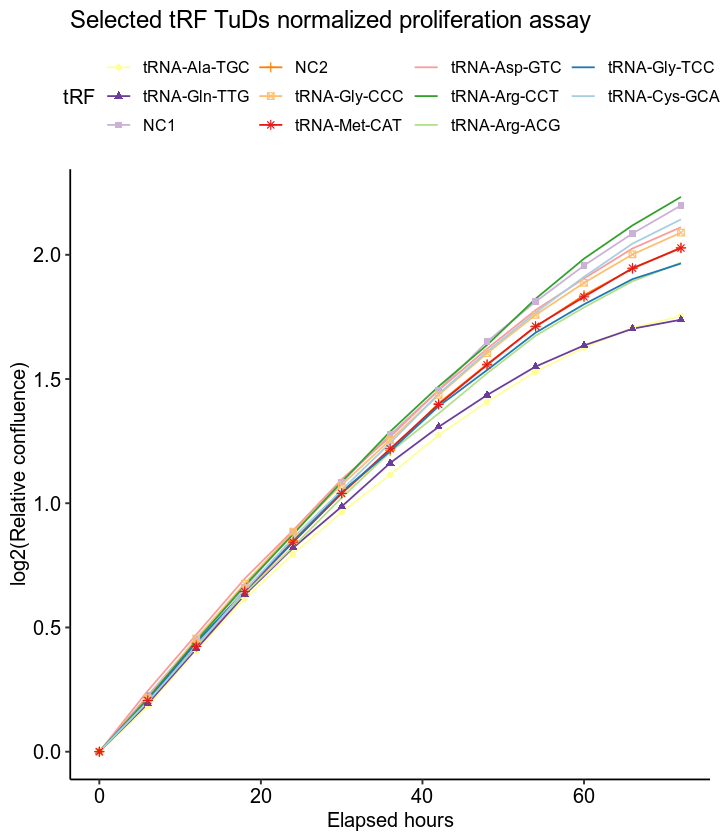

In [5]:
options(repr.plot.width=6, repr.plot.height=7)
## normalized starting point proliferation assay plot
## get log2 version of data
log2_wider_selected_TuDs_tRFs_proliferation_assay_mean = cbind('Elapsed hours' = wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`, wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-`Elapsed hours`) %>% log2())
minimum = log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) %>% min()
diff_from_minimum =  log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) - minimum
diff_from_minimum = as.numeric(diff_from_minimum)
## first subract min from all points
zeroed_data = log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-`Elapsed hours`) - minimum

## then subtract difference between min and first points from all points
normalized_log2_data = zeroed_data
for (i in 1:ncol(zeroed_data)){
    normalized_log2_data[,i] = zeroed_data[,i] - diff_from_minimum[i]
}
normalized_log2_data = cbind('Elapsed hours' = wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`, normalized_log2_data)

## plot
normalized_longer_log2_data = normalized_log2_data %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('tRF'), values_to = 'mean') %>% as.data.frame()
normalized_longer_log2_data$tRF = factor(normalized_longer_log2_data$tRF, levels = c('tRNA-Ala-TGC', 'tRNA-Gln-TTG', 'NC1', 'NC2', 'tRNA-Gly-CCC', 'tRNA-Met-CAT', 'tRNA-Asp-GTC', 'tRNA-Arg-CCT', 'tRNA-Arg-ACG', 'tRNA-Gly-TCC', 'tRNA-Cys-GCA'))
ggplot(normalized_longer_log2_data, aes(x = `Elapsed hours`, y = mean, color = tRF, shape = tRF)) +
geom_line() +
geom_point() +
theme_pubr() + scale_color_brewer(palette = "Paired", direction = -1) + 
labs(title = "Selected tRF TuDs normalized proliferation assay",
      x = "Elapsed hours",
      y = "log2(Relative confluence)")

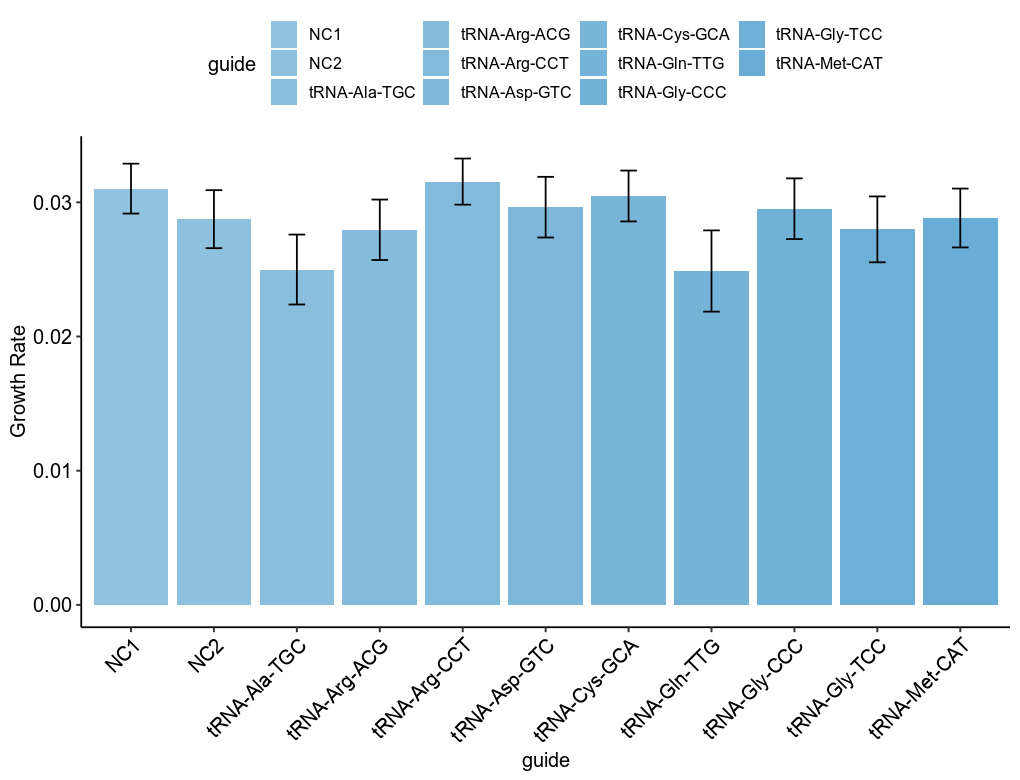

In [6]:
options(repr.plot.width=8.5, repr.plot.height=6.5)
## fitted line slopes logged
slopes = list()
upper_error = list()
lower_error = list()
n = 1
for (i in 1:length(colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean))){
    if (i > 1){
        slopes[[n]] = as.numeric(coef(lm(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean[,i] ~ log2_wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`))[2])
        limits = abs(slopes[[n]] - as.numeric(confint(lm(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean[,i] ~ log2_wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`))[2,]))
        upper_error[[n]] = limits[2]
        lower_error[[n]] = limits[1]
        n = n + 1
    }
}

names(slopes) = colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean)[!colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean) %in% 'Elapsed hours']
slopes = unlist(slopes)
slopes_df = data.frame(guide = names(slopes[order(slopes)]), slope = slopes[order(slopes)], upper_error = unlist(upper_error)[order(slopes)], lower_error = unlist(lower_error)[order(slopes)])
ggplot(data = slopes_df, aes(x = guide, y = slope, fill = guide)) +
  geom_bar(stat = "identity") + scale_fill_manual(values = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(100)[41:(40 + nrow(slopes_df))]) + geom_errorbar(aes(ymin = slope - lower_error, ymax = slope + upper_error), width=.2) + ylab('Growth Rate') + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [7]:
ggsave('/home/ssobti/projects/mir_tud/notebooks/cellcycle/tRF_wetlab_followup/selected_TuDs_proliferation_assay1.pdf', width = 8.5, height = 6.5)

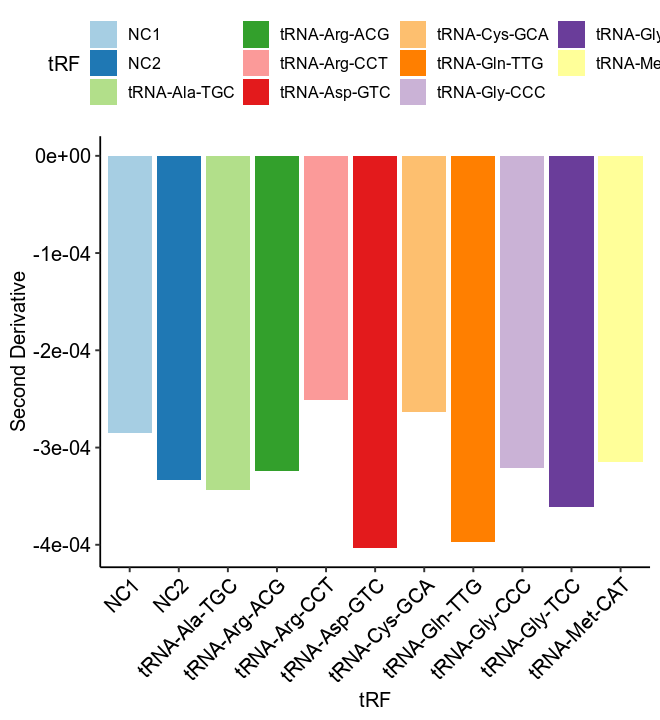

In [7]:
options(repr.plot.width=5.5, repr.plot.height=6)
## look at second derivative of the data
second_derivatives = data.frame(apply(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-"Elapsed hours"), 2, function(x) mean(diff(diff(x)/6)/6)))
colnames(second_derivatives) = 'Second Derivative'
second_derivatives$tRF = rownames(second_derivatives)
ggplot(data = second_derivatives, aes(x = tRF, y = `Second Derivative`, fill = tRF)) +
  geom_bar(stat = "identity") + scale_fill_brewer(palette = "Paired") + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))